In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import xgboost  as xgb
from xgboost import XGBClassifier
import lightgbm as lgbm
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



### Hyperparameter Optimization with Optuna in machine learning dataset

Dataset: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset 

We will use different machine learning models for binary classification. We will use gridsearch,randomsearch and TPE (Optuna) to find the best hyperparameters for each model.

In [2]:
# Read dataset
dataset = pd.read_csv('./dataset/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Text(0.5, 1.0, 'Countplot target')

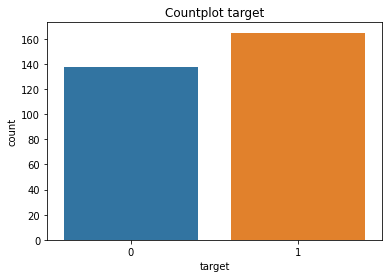

In [4]:
# check balance dataset
sns.countplot(data=dataset, x="target")
plt.title('Countplot target')


In [5]:
# statistics of dataset
dataset.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<AxesSubplot:>

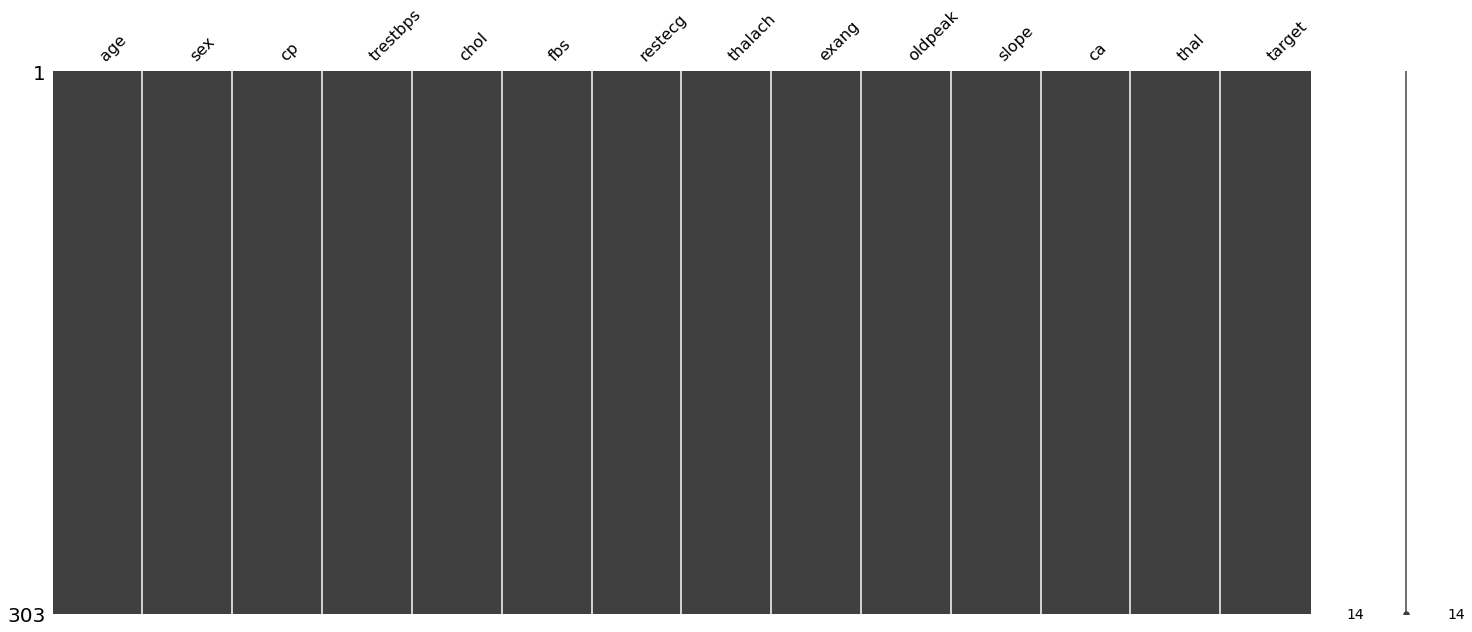

In [7]:
# show missing values

missing_values_count = dataset.isnull().sum()
print(missing_values_count)
msno.matrix(dataset)

C:\Users\domin\AppData\Local\Temp\ipykernel_1232\1331905442.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

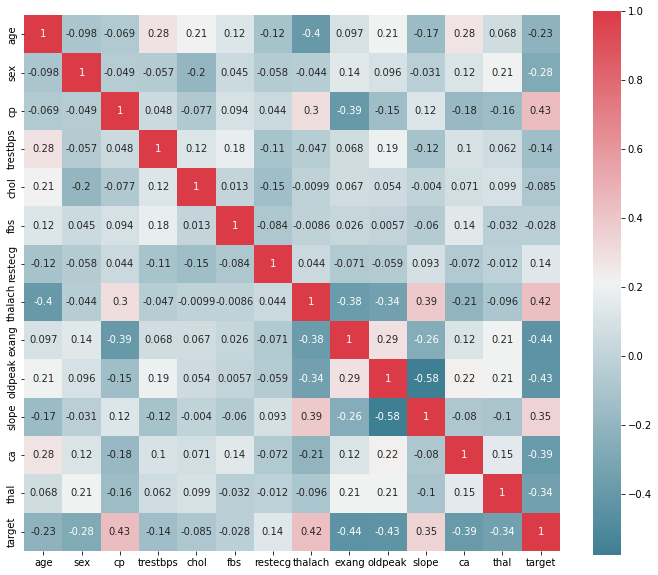

In [8]:
# Lineair correlation  - heatmap

dataset.corr()

# Visualise correlation matrix
f, ax = plt.subplots(figsize=(12, 10))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

### Preprocessing and splitting the dataset

Splits de dataset in **features en targets**.

In [9]:
# Opsplitsen in features en targets
y = dataset['target'].values
X = dataset.drop(['target'], axis = 1).values

print(X.shape)
print(y.shape)


#1 list  of 303 values, 13 features

(303, 13)
(303,)


In [10]:
# Split in training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

#training set
print(X_train.shape)

#test set
print(X_test.shape)



(203, 13)
(100, 13)


**Scale the dataset**.

In [11]:
# Normaliseren / scaling of the training set en de test set
scaler = StandardScaler() #scalen
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train[1]

array([ 0.96913179, -1.30639453,  0.98753845,  0.24126801,  0.07503002,
       -0.42453805, -1.03034527,  0.97945954, -0.71758301, -0.91869649,
        0.95032889, -0.67895599, -0.44452637])

## Standard Logistic Regression

coefficiënten:  [[ 0.01296485 -1.49171803  0.86509583 -0.01527199 -0.0034304  -0.0971158
   0.59114837  0.03057998 -0.86523206 -0.52162656  0.57916031 -0.76370846
  -0.85940812]]
intercept: [0.08608248]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        48
           1       0.83      0.73      0.78        52

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100

78.0
[[40  8]
 [14 38]]


c:\Users\domin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


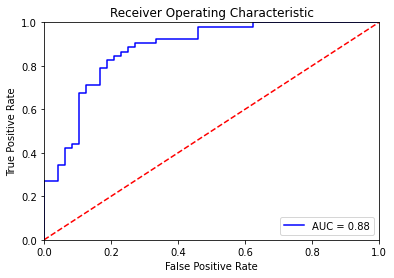

In [13]:
# Train een logistic regression classifier

logreg = linear_model.LogisticRegression(C=1e3, solver='lbfgs') # C= Inverse of regularization strength;
                                                # must be a positive float. Like in support vector machines,



    # smaller values specify stronger regularization.
logreg.fit(X, y)

print('coefficiënten: ',logreg.coef_)
print('intercept:',logreg.intercept_)


# testen van de logistic regression classifier

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))

print(accuracy_score(y_test,y_pred)*100)


print(confusion_matrix(y_test,y_pred))


# ROC curve
# ROC

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [14]:
#Accuracy of standard logistic regression: 78

### Grid Search (hyperparameter tuning)

In [15]:
# Grid search logistic regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
paramaters = [
             {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000, 100000]}                                       
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

Best accuracy :  0.8669512195121951
Best parameters : {'C': 0.1}
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        48
           1       0.80      0.87      0.83        52

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100

[[37 11]
 [ 7 45]]
82.0


### Random Search (hyperparameter tuning)

In [16]:
#Random Search Logistic Regression

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
paramaters = [
                {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000,10000, 100000]}
]

random_search = RandomizedSearchCV(estimator = model,
                                      param_distributions = paramaters,
                                        scoring = 'accuracy',
                                        cv = 5,
                                        n_jobs=-1)
random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :', random_search.best_params_)

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

                




Best accuracy :  0.8669512195121951
Best parameters : {'C': 0.1}
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        48
           1       0.80      0.87      0.83        52

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100

[[37 11]
 [ 7 45]]
82.0


c:\Users\domin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


## Logistic regression Grid/Random Search

coefficiënten:  [[ 0.00470321 -0.67219614  0.62965214 -0.01498673 -0.0025095  -0.01792394
   0.2381575   0.02751955 -0.43897636 -0.46545708  0.2872171  -0.56938787
  -0.56144712]]
intercept: [0.00650515]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        48
           1       0.84      0.83      0.83        52

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100

83.0
[[40  8]
 [ 9 43]]


c:\Users\domin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


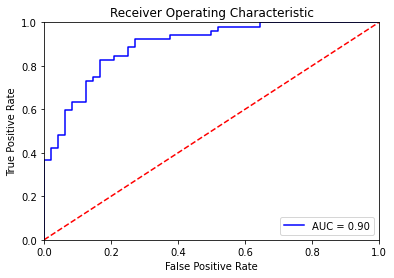

In [17]:
# Train een logistic regression classifier

logreg = linear_model.LogisticRegression(C=0.1, solver='lbfgs') # C= Inverse of regularization strength;
                                                # must be a positive float. Like in support vector machines,



    # smaller values specify stronger regularization.
logreg.fit(X, y)

print('coefficiënten: ',logreg.coef_)
print('intercept:',logreg.intercept_)


# testen van de logistic regression classifier

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))

print(accuracy_score(y_test,y_pred)*100)


print(confusion_matrix(y_test,y_pred))


# ROC curve
# ROC

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion Grid and Random Search
With Grid and random search we have an accuracy of 83.<br>
Grid/Random Search found C=0.1 as  optimal parameter.

### Optuna (hyperparameter tuning)

In [18]:
#logistic regression met Optuna(TPE)

import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def objective(trial):
    C = trial.suggest_loguniform('C', 1e-7, 10.0)
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    model = LogisticRegression(C=C, solver=solver)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction='maximize' )
study.optimize(objective, n_trials=100)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)



c:\Users\domin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-01-29 01:31:52,664] A new study created in memory with name: no-name-d4707ab6-9457-418b-852b-5ff8d72ae9b3
C:\Users\domin\AppData\Local\Temp\ipykernel_1232\2279792812.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 1e-7, 10.0)
[I 2023-01-29 01:31:52,668] Trial 0 finished with value: 0.52 and parameters: {'C': 6.046858608456651e-06, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.52.
C:\Users\domin\AppData\Local\Temp\ipykernel_1232\2279792812.py:8: FutureWarning: suggest_loguniform has been deprec

Number of finished trials: 100
Best trial: {'C': 0.11482668253882096, 'solver': 'saga'}
Best value: 0.83


c:\Users\domin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


coefficiënten:  [[ 0.00375624 -0.60310854  0.60657089 -0.01508497 -0.00246804 -0.0159092
   0.21478458  0.02736444 -0.40293735 -0.45336488  0.26290796 -0.53904637
  -0.53080884]]
intercept: [-0.00486044]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        48
           1       0.84      0.83      0.83        52

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100

83.0
[[40  8]
 [ 9 43]]


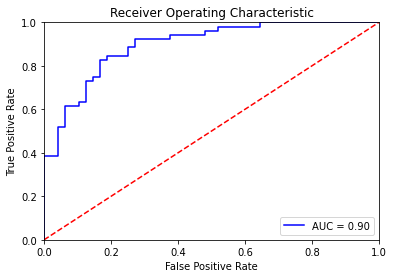

In [19]:
# Train een logistic regression classifier met Optuna tuning

logreg = linear_model.LogisticRegression(C=0.0817723588226237, solver='lbfgs') # C= Inverse of regularization strength;
                                                # must be a positive float. Like in support vector machines,



    # smaller values specify stronger regularization.
logreg.fit(X, y)

print('coefficiënten: ',logreg.coef_)
print('intercept:',logreg.intercept_)

# testen van de logistic regression classifier

y_pred = logreg.predict(X_test)

print(classification_report(y_test,y_pred))

print(accuracy_score(y_test,y_pred)*100)


print(confusion_matrix(y_test,y_pred))


# ROC curve
# ROC

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Conclusion Optuna
With optuna we also have an accuracy of 83.<br>


### Feature engineering



In [21]:
# add polynomial features

from sklearn.preprocessing import PolynomialFeatures


# Higher order features
graad = 3

poly = PolynomialFeatures(graad)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print('dimensie van X_train_poly: ',X_train_poly.shape)
print('dimensie van X_test_poly: ',X_test_poly.shape)

#scalen (optioneel?)
scaler_poly = StandardScaler()
scaler_poly.fit(X_train_poly)

X_train_poly = scaler_poly.transform(X_train_poly)
X_test_poly = scaler_poly.transform(X_test_poly)


# met L2 regularisatie via Ridge regression
lregmodel_poly = Ridge(alpha=20,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)

print('R2 score on test set via L2: ',lregmodel_poly.score(X_test_poly,y_test))
# R2 -score via L2 op de trainingset
print('R2 score on training set via L2: ',lregmodel_poly.score(X_train_poly,y_train))


# met L1 regularisatie via Lasso regression
lregmodel_poly = Lasso(alpha=0.001,tol=0.001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)      
  
      
print('R2 score on test set via L1: ',lregmodel_poly.score(X_test_poly,y_test))
  
# R2 -score via L1 op de trainingset
print('R2 score on training set via L1: ',lregmodel_poly.score(X_train_poly,y_train))  


dimensie van X_train_poly:  (203, 560)
dimensie van X_test_poly:  (100, 560)
R2 score op test set via L2:  0.10770997352851197
R2 score op training set via L2:  0.9613348798344924
R2 score op test set via L1:  -0.5127777298378782
R2 score op training set via L1:  0.9874164676110175


# Support Vector Machines

## Standard SVM

In [23]:
# Support Vector Machine/SVM (Lineair)

SVMlinear = SVC(kernel='linear',C=10, class_weight='balanced')
SVMlinear.fit(X_train, y_train)


SVC(C=10, class_weight='balanced', kernel='linear')

In [24]:
#SVM (lineair) model testing
y_pred = SVMlinear.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79        48
           1       0.80      0.83      0.81        52

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100

[[37 11]
 [ 9 43]]
80.0


In [25]:
# With standard SVM we have an accuracy of 80

### Grid Search (hyperparameter tuning)

In [26]:
from sklearn.model_selection import GridSearchCV
#from sklearn.learning_curve import learning_curve
from sklearn.svm import SVC
#from sklearn import cross_validation
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

model = SVC()
paramaters = [ 
        {'kernel': ['linear'], 'C': np.linspace(1,20,100)},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2]},
        {'kernel': ['poly'], 'C':[1, 10]} ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 10, # K
                           n_jobs = -1,
                           verbose = 4)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 




Fitting 10 folds for each of 112 candidates, totalling 1120 fits
Best accuracy :  0.8376190476190477
Best parameters : {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.89      0.71      0.79        48
           1       0.77      0.92      0.84        52

    accuracy                           0.82       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.82      0.82       100

[[34 14]
 [ 4 48]]
82.0


## SVM via Grid Search

In [27]:
# Support Vector Machine/SVM (Met Kernel)
SVMkernel = SVC(kernel='rbf',C=10,gamma=0.01, class_weight='balanced')
#SVMkernel = svm.SVC(kernel='poly',C=1)
SVMkernel.fit(X_train, y_train)

SVC(C=10, class_weight='balanced', gamma=0.01)

In [28]:

#SVM (met Kernel) model testen
y_pred = SVMkernel.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        48
           1       0.82      0.88      0.85        52

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100

[[38 10]
 [ 6 46]]
84.0


In [29]:
#SVM (met Kernel) model via Grid search scores better with 84

In [56]:
#SVM met random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

model = SVC()
paramaters = {
        'kernel': ['linear', 'rbf'],
        'C': truncnorm(a=0, b=100, loc=10, scale=10),
        'gamma': uniform(loc=0, scale=1),
        'degree': randint(1, 5)
        }
random_search = RandomizedSearchCV(estimator = model,
                                        param_distributions = paramaters,
                                        n_iter = 100,
                                        scoring = 'accuracy',
                                        cv = 10, # K
                                        n_jobs = -1,
                                        verbose = 4)
random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :', random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100)




Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best accuracy :  0.818095238095238
Best parameters : {'C': 16.35488404523373, 'degree': 1, 'gamma': 0.918941300249714, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        48
           1       0.79      0.87      0.83        52

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100

[[36 12]
 [ 7 45]]
81.0


In [59]:
# Support Vector Machine/SVM (With Kernel)
SVMkernel = SVC(kernel='linear',C=16.35488404523373,gamma=0.918941300249714)
#SVMkernel = svm.SVC(kernel='poly',C=1)
SVMkernel.fit(X_train, y_train)

SVC(C=16.35488404523373, gamma=0.918941300249714, kernel='linear')

In [60]:

#SVM (with Kernel) model testing
y_pred = SVMkernel.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        48
           1       0.79      0.87      0.83        52

    accuracy                           0.81       100
   macro avg       0.81      0.81      0.81       100
weighted avg       0.81      0.81      0.81       100

[[36 12]
 [ 7 45]]
81.0


### Optuna (hyperparameter tuning)

In [30]:
#SVM (met Kernel) model via Optuna

def objective(trial):
    C = trial.suggest_loguniform('C', 1e-10, 1e+10)
    gamma = trial.suggest_loguniform('gamma', 1e-10, 1e+10)
    # solver = trial.suggest_categorical('solver', ['linear',  'rbf', 'poly', 'sigmoid'])
    model = SVC(C=C, gamma=gamma)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)





study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)





[I 2023-01-29 01:31:56,831] A new study created in memory with name: no-name-02c3532b-6fc8-4b60-a411-3c61ceeb237b
C:\Users\domin\AppData\Local\Temp\ipykernel_1232\2742448039.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 1e-10, 1e+10)
C:\Users\domin\AppData\Local\Temp\ipykernel_1232\2742448039.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 1e-10, 1e+10)
[I 2023-01-29 01:31:56,990] Trial 0 finished with value: 0.81 and parameters: {'C': 4894453890.359271, 'gamma': 0.0002950467971817444}. Best is trial 0 with value: 0.81.
C:\Users\domin\AppData\Local\Temp\ipyker

Number of finished trials: 100
Best trial: {'C': 96110.17008674097, 'gamma': 0.0003732986968792942}


In [31]:
# # Support Vector Machine/SVM (Met Kernel)
SVMkernel = SVC(kernel='rbf',C= 81814.19242176555,gamma=0.0010157833920138035, class_weight='balanced')
#SVMkernel = svm.SVC(kernel='poly',C=1)
SVMkernel.fit(X_train, y_train)


#SVM (met Kernel) model testen
y_pred = SVMkernel.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        48
           1       0.87      0.87      0.87        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100

[[41  7]
 [ 7 45]]
86.0


## Results SVM
Normal: 80%<br>
Grid search: 84%<br>
Random search: 81%<br>
TPE: 86%<br>


## Random  Forest

In [62]:
# Trainen en testen van een random forest tree classifier
number_of_trees = 200
max_number_of_features = 4

RFCmodel = RandomForestClassifier(n_estimators=number_of_trees, max_features=max_number_of_features)

RFCmodel.fit(X_train,y_train)

print(RFCmodel.feature_importances_)

[0.08087597 0.04796571 0.12345515 0.06519916 0.0762099  0.00962695
 0.0161727  0.11116102 0.05801077 0.13618863 0.04481506 0.1169133
 0.11340567]


In [63]:
# Test Random Forest Classifier

y_pred = RFCmodel.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        48
           1       0.80      0.87      0.83        52

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100

[[37 11]
 [ 7 45]]
82.0


In [64]:
#random forest tree classifier via grid search
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
paramaters = {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
        }
grid_search = GridSearchCV(estimator = model,
                                        param_grid = paramaters,
                                        scoring = 'accuracy',
                                        cv = 10, # K
                                        n_jobs = -1,
                                        verbose = 4)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)

print(accuracy_score(y_test, y_pred) * 100)



Fitting 10 folds for each of 150 candidates, totalling 1500 fits


c:\Users\domin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best accuracy :  0.8476190476190476
Best parameters : {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 400}
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        48
           1       0.82      0.87      0.84        52

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100

[[38 10]
 [ 7 45]]
83.0


In [66]:
#random forest tree classifier via random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

model = RandomForestClassifier()
paramaters = {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
        }
random_search = RandomizedSearchCV(estimator = model,
                                        param_distributions = paramaters,
                                        n_iter = 100,
                                        scoring = 'accuracy',
                                        cv = 10, # K
                                        n_jobs = -1,
                                        verbose = 4)
random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :', random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)

print(accuracy_score(y_test, y_pred) * 100)







Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best accuracy :  0.8526190476190477
Best parameters : {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        48
           1       0.81      0.88      0.84        52

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100

[[37 11]
 [ 6 46]]
83.0


In [34]:
#With Random forrest we have an accuracy of 83

### Optuna Random Forest Classifier (hyperparameter tuning)

In [35]:
# #Optuna random forest classifier


# def objective(trial):
#     n_estimators = trial.suggest_int('n_estimators', 10, 1000)
#     max_features = trial.suggest_int('max_features', 1, 4)
#     model = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     return accuracy_score(y_test, y_pred)


# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)


# print('Number of finished trials:', len(study.trials))
# print('Best trial:', study.best_trial.params)


### Random Forest with Optuna hyperparameters

In [36]:
# Trainen en testen van een random forest tree classifier
number_of_trees = 200
max_number_of_features = 4

RFCmodel = RandomForestClassifier(n_estimators=32, max_features=2)

RFCmodel.fit(X_train,y_train)

print(RFCmodel.feature_importances_)


# Test Random Forest Classifier

y_pred = RFCmodel.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

[0.0785475  0.05100085 0.08933085 0.06777493 0.0885874  0.00895565
 0.01646576 0.13867303 0.06107319 0.121159   0.0475741  0.12718118
 0.10367656]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        48
           1       0.83      0.87      0.85        52

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100

[[39  9]
 [ 7 45]]
84.0


## Results Random Forest
Normal: 82%<br>
Grid search: 83%<br>
Random search: 82%<br>
TPE: 84%<br>


## Boosting


### Adaboosting

In [67]:
# Boosting
# Adaboost
clf_adaboost = AdaBoostClassifier(n_estimators=50,learning_rate=0.90)
clf_adaboost.fit(X_train,y_train)

y_pred = clf_adaboost.predict(X_test)

print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        48
           1       0.81      0.81      0.81        52

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100

[[38 10]
 [10 42]]
80.0


In [68]:
# AdaBoostClassifier met grid search
from sklearn.model_selection import GridSearchCV

model = AdaBoostClassifier()
paramaters = {
        'n_estimators': [100, 200, 300, 400, 500],
        'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
        }
grid_search = GridSearchCV(estimator = model,
                                        param_grid = paramaters,
                                        scoring = 'accuracy',
                                        cv = 10, # K
                                        n_jobs = -1,
                                        verbose = 4)
grid_search = grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)

print(accuracy_score(y_test, y_pred) * 100)



Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best accuracy :  0.818095238095238
Best parameters : {'learning_rate': 0.1, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        48
           1       0.83      0.87      0.85        52

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100

[[39  9]
 [ 7 45]]
84.0


In [72]:
# adaboost classifier via random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

model = AdaBoostClassifier()
paramaters = {
        'n_estimators': [100, 200, 300, 400, 500],
        'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
        }
random_search = RandomizedSearchCV(estimator = model,
                                        param_distributions = paramaters,
                                        n_iter = 100,
                                        scoring = 'accuracy',
                                        cv = 10, # K
                                        n_jobs = -1,
                                        verbose = 4)
random_search = random_search.fit(X_train, y_train)

best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_

print('Best accuracy : ', random_search.best_score_)
print('Best parameters :', random_search.best_params_  )

y_pred = random_search.predict(X_test)
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)
print(cf)

print(accuracy_score(y_test, y_pred) * 100)



c:\Users\domin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 25 is smaller than n_iter=100. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best accuracy :  0.818095238095238
Best parameters : {'n_estimators': 100, 'learning_rate': 0.1}
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        48
           1       0.83      0.87      0.85        52

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100

[[39  9]
 [ 7 45]]
84.0


In [73]:
#adaBoostClassifier met optuna

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 1000)
    learning_rate = trial.suggest_uniform('learning_rate', 0.01, 1.0)
    model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)


print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)

[I 2023-01-29 02:36:40,894] A new study created in memory with name: no-name-f9cc5baf-4819-4d0f-975c-48e535dbce42
C:\Users\domin\AppData\Local\Temp\ipykernel_1232\3102116963.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 1.0)
[I 2023-01-29 02:36:41,485] Trial 0 finished with value: 0.8 and parameters: {'n_estimators': 407, 'learning_rate': 0.5674650963717697}. Best is trial 0 with value: 0.8.
C:\Users\domin\AppData\Local\Temp\ipykernel_1232\3102116963.py:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_uniform('learning_rate', 0.01, 1.0)
[I 2023-01-29 02:3

Number of finished trials: 100
Best trial: {'n_estimators': 540, 'learning_rate': 0.011410987309629682}
Best value: 0.86


## Results Adaboost
Normal: 80%<br>
Grid search: 84%<br>
Random search: 84%<br>
TPE: 86%<br>
